In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_10000.csv")

In [3]:
print(df.head)
print(df.columns)
print(df.shape)

<bound method NDFrame.head of       Employee_ID  Age  Gender Marital_Status Department   Job_Role  \
0               1   58    Male         Single    Finance    Manager   
1               2   48  Female       Divorced         HR  Assistant   
2               3   34  Female        Married  Marketing    Manager   
3               4   27  Female       Divorced         HR    Manager   
4               5   40    Male        Married         HR    Analyst   
...           ...  ...     ...            ...        ...        ...   
9995         9996   22  Female       Divorced  Marketing    Manager   
9996         9997   35  Female       Divorced  Marketing  Executive   
9997         9998   23    Male       Divorced         IT    Manager   
9998         9999   42  Female         Single  Marketing    Manager   
9999        10000   39  Female       Divorced    Finance  Executive   

      Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0             5            7332     

In [4]:
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [5]:
print(df.dtypes)

Employee_ID                       int64
Age                               int64
Gender                           object
Marital_Status                   object
Department                       object
Job_Role                         object
Job_Level                         int64
Monthly_Income                    int64
Hourly_Rate                       int64
Years_at_Company                  int64
Years_in_Current_Role             int64
Years_Since_Last_Promotion        int64
Work_Life_Balance                 int64
Job_Satisfaction                  int64
Performance_Rating                int64
Training_Hours_Last_Year          int64
Overtime                         object
Project_Count                     int64
Average_Hours_Worked_Per_Week     int64
Absenteeism                       int64
Work_Environment_Satisfaction     int64
Relationship_with_Manager         int64
Job_Involvement                   int64
Distance_From_Home                int64
Number_of_Companies_Worked        int64


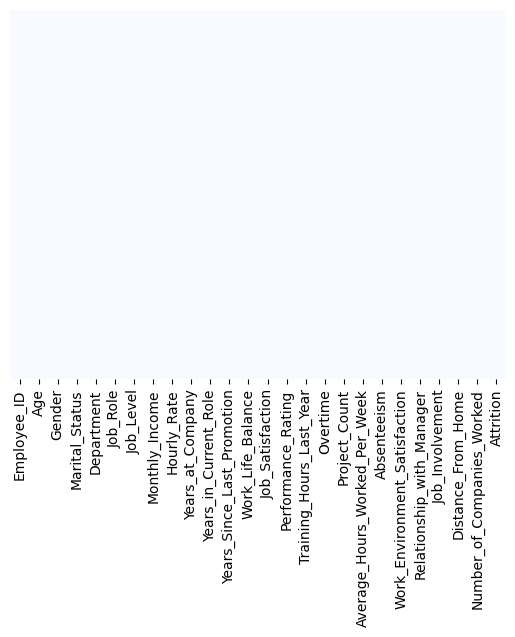

In [6]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels =False, xticklabels =df.columns);

In [7]:
attrition_counts = df['Attrition'].value_counts()

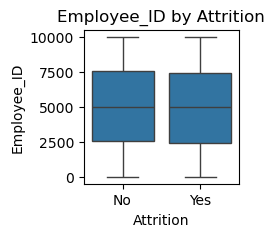

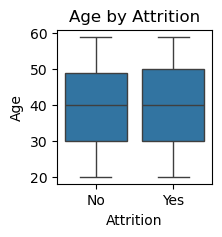

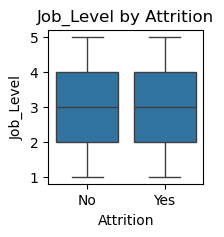

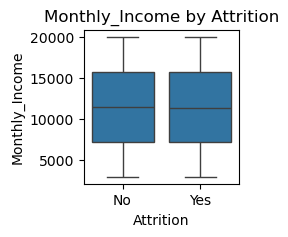

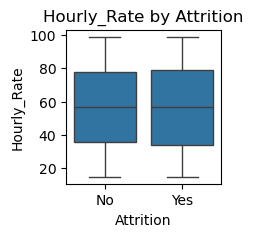

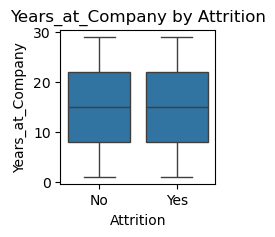

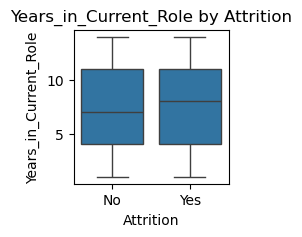

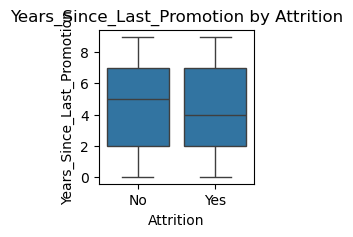

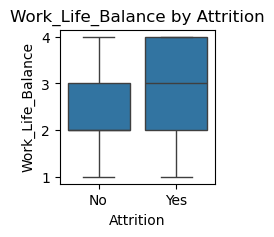

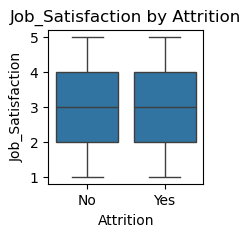

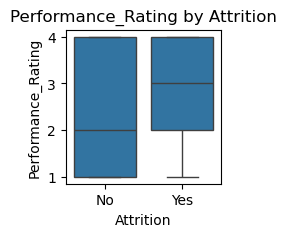

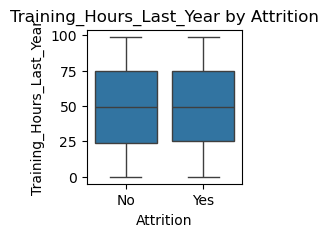

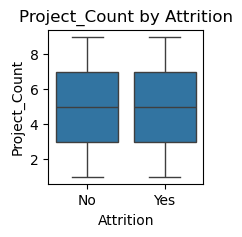

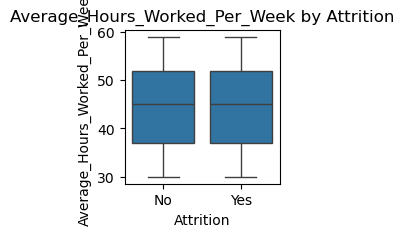

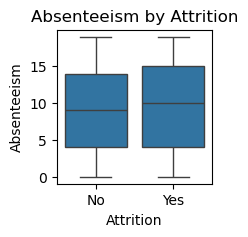

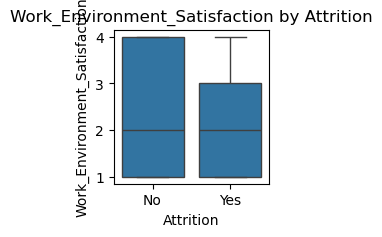

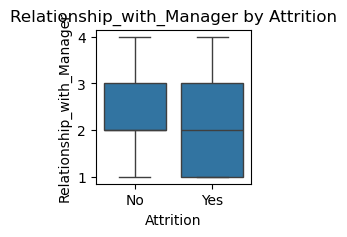

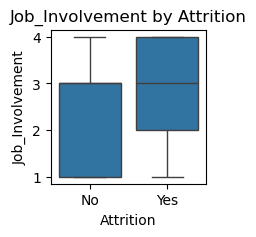

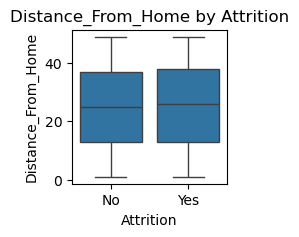

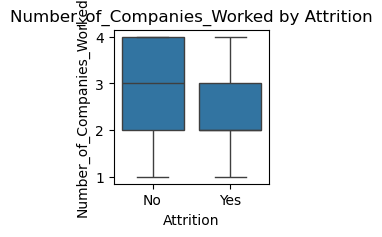

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(2, 2))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} by Attrition')
    plt.show()

In [10]:
df['Attrition_Flag'] = df['Attrition'].astype(str).str.lower().map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')
df_encoded = df_encoded.dropna()
corr = df_encoded.corr()['Attrition_Flag'].sort_values(ascending=False)
print(corr)

Attrition_Yes                    1.000000
Attrition_Flag                   1.000000
Job_Role_Assistant               0.021360
Work_Life_Balance                0.015227
Job_Involvement                  0.014954
Performance_Rating               0.011856
Job_Level                        0.011415
Distance_From_Home               0.011361
Age                              0.007798
Gender_Male                      0.007448
Project_Count                    0.006802
Years_in_Current_Role            0.005120
Department_IT                    0.004687
Marital_Status_Single            0.003187
Years_at_Company                 0.002682
Overtime_Yes                     0.002537
Job_Satisfaction                 0.002142
Job_Role_Executive               0.001474
Absenteeism                      0.000514
Monthly_Income                   0.000135
Training_Hours_Last_Year        -0.000539
Department_Sales                -0.001872
Years_Since_Last_Promotion      -0.001936
Average_Hours_Worked_Per_Week   -0

Text(0.5, 1.0, 'Correlation Heatmap')

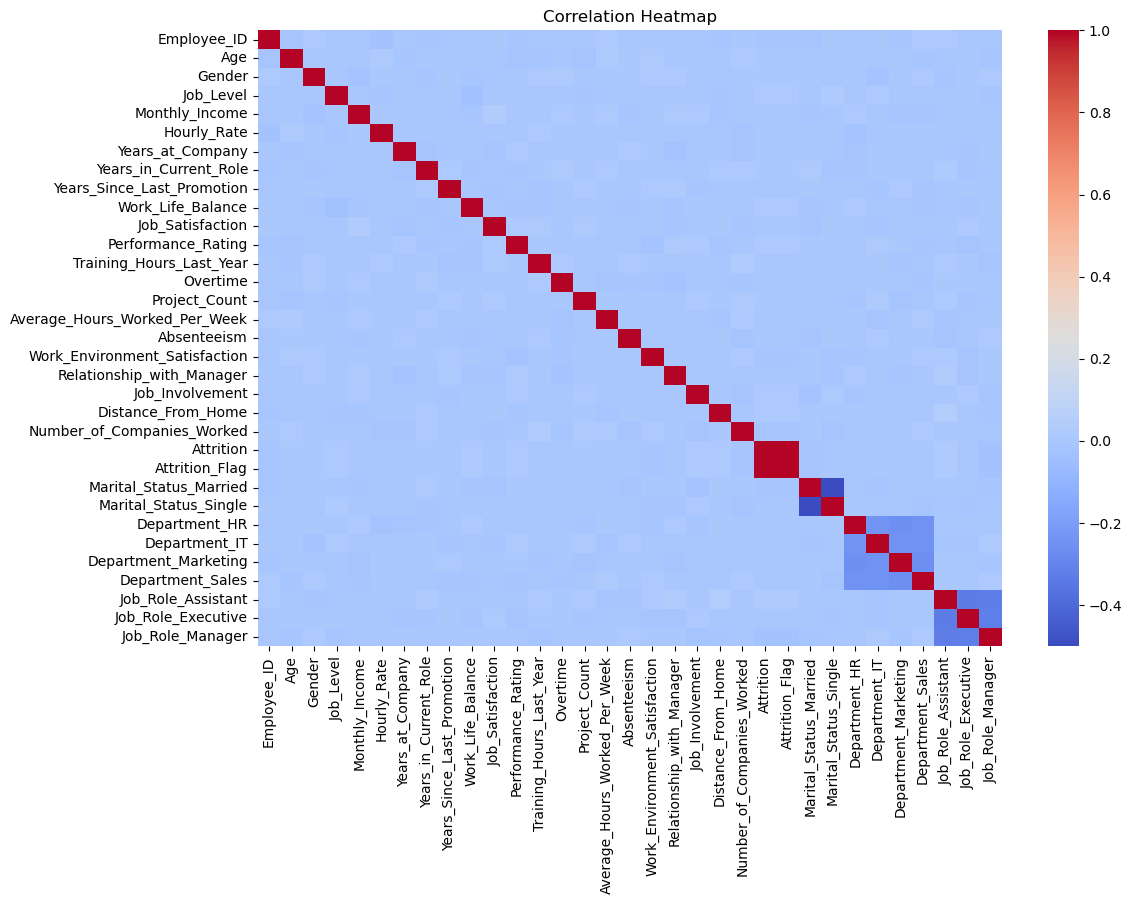

In [16]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")

In [11]:
df['Overtime'] = df['Overtime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Marital_Status', 'Department', 'Job_Role'], drop_first=True)

In [14]:
X = df.iloc [:,1:]
y = df.iloc[:,0]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Adaboost

In [20]:
#SVM

In [21]:
#RandomForest

In [22]:
#KNN

In [23]:
#GradientBoost

In [25]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1592    0]
 [   0  408]]


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:26:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [1]:
##Copied from website
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'pd' is not defined